## 2.Load Data
- **Abstract:** This dataset summarizes a heterogeneous set of features about articles published by Mashable in a period of two years. The goal is to predict the number of shares in social networks (popularity)

In [1]:
# As usual, a bit of setup
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# pd.set_option('display.max_rows', 1000)

%matplotlib inline
plt.rcParams['figure.figsize'] = (20,15) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
df = pd.read_csv('/work/cseos2g/datduyn/Documents/datasets/OnlineNewsPopularity/OnlineNewsPopularity.csv',
                delimiter=', ')

/util/opt/anaconda/4.3.14/envs/jupyterhub-root/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


## 3. Quick check of the data

In [3]:
#Visualize the first few row
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


## 4. Description of the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                              39644 non-null object
timedelta                        39644 non-null float64
n_tokens_title                   39644 non-null float64
n_tokens_content                 39644 non-null float64
n_unique_tokens                  39644 non-null float64
n_non_stop_words                 39644 non-null float64
n_non_stop_unique_tokens         39644 non-null float64
num_hrefs                        39644 non-null float64
num_self_hrefs                   39644 non-null float64
num_imgs                         39644 non-null float64
num_videos                       39644 non-null float64
average_token_length             39644 non-null float64
num_keywords                     39644 non-null float64
data_channel_is_lifestyle        39644 non-null float64
data_channel_is_entertainment    39644 non-null float64
data_channel_is_bus              39644 non-null floa

## 5.Dimension of the data
- 39644: training example and 61 data features

In [5]:
print("datafram dim:",df.shape)

datafram dim: (39644, 61)


## 6. Visualiza of data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2b1cf8007e48>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x2b1cefb7cd30>]], dtype=object)

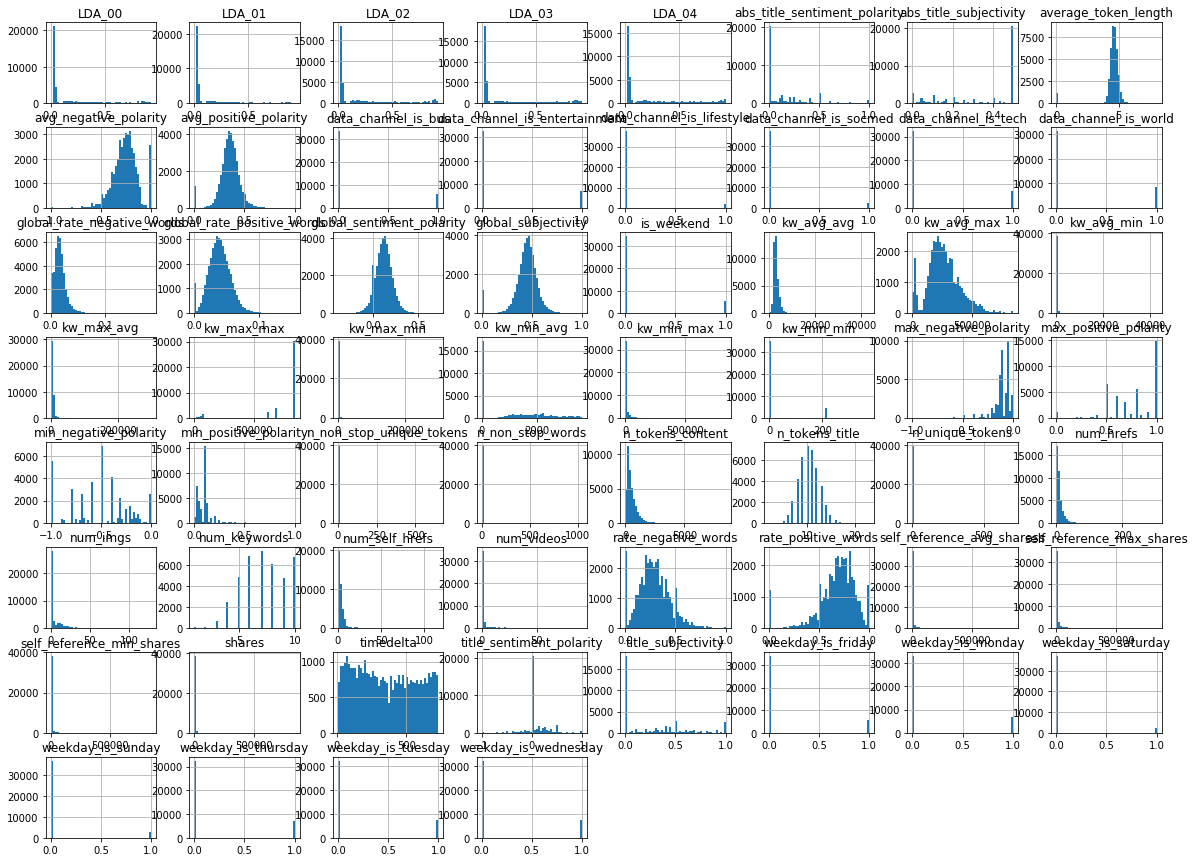

In [6]:
# Import Matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline

#Bin tell how discrete the data is
#higher bin more discrete or more sparse
df.hist(bins=50, figsize=(20,15)) 

## 7.Explore the data

### 7(a) Explore the data: Describe Numerical attribute

In [7]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


### 7(B).Describe the column with categorical atribute
- In this case, there is only one object(not numerical) attribute which is the url of the article

In [8]:
for col in df.columns:
    if df[col].dtype == 'object':
        print('\nColumn Name:', col,)


Column Name: url


### 7(C) Explore the data: Explore the columns

In [9]:
df['shares'][0:10]

0     593
1     711
2    1500
3    1200
4     505
5     855
6     556
7     891
8    3600
9     710
Name: shares, dtype: int64

### 7(d) Check the invalid(zeros) values in a column

In [10]:
(df['shares'] == 0).sum()

0

## 8. Data Cleaning
- In this case, instance with 'na' should be drop. instance with 0 should should  not be drop. since there are many binary attribute

### 8(a) Drop the "na" missing value

In [11]:

df = df.dropna()


In [12]:
df.isnull().sum() # See if any have NA value(or null)

url                              0
timedelta                        0
n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
n_non_stop_words                 0
n_non_stop_unique_tokens         0
num_hrefs                        0
num_self_hrefs                   0
num_imgs                         0
num_videos                       0
average_token_length             0
num_keywords                     0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_bus              0
data_channel_is_socmed           0
data_channel_is_tech             0
data_channel_is_world            0
kw_min_min                       0
kw_max_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_max_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_max_avg                       0
kw_avg_avg                       0
self_reference_min_s

### 8(b) Drop the "non-na" missing value

In [13]:
# NOTE: Doing this operation below Increase my MSE error. 
# I found that I should not drop any data field.

# (df['num_videos'] == 0).sum()

# #Drop the zeros video value
# df = df[df['num_videos'] > 0]


### 8(c) REplace the missing value
- Nothing to be replace

In [14]:
#Drop the 'na' in this case there is no 'na' instance
df.dropna()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.700000,-0.350000,-0.600000,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.700000,-0.118750,-0.125000,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.000000,-0.466667,-0.800000,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.800000,-0.369697,-0.600000,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.000000,-0.220192,-0.500000,-0.050000,0.454545,0.136364,0.045455,0.136364,505
5,http://mashable.com/2013/01/07/beewi-smart-toys/,731.0,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,...,0.136364,0.600000,-0.195000,-0.400000,-0.100000,0.642857,0.214286,0.142857,0.214286,855
6,http://mashable.com/2013/01/07/bodymedia-armba...,731.0,8.0,960.0,0.418163,1.0,0.549834,21.0,20.0,20.0,...,0.100000,1.000000,-0.224479,-0.500000,-0.050000,0.000000,0.000000,0.500000,0.000000,556
7,http://mashable.com/2013/01/07/canon-poweshot-n/,731.0,12.0,989.0,0.433574,1.0,0.572108,20.0,20.0,20.0,...,0.100000,1.000000,-0.242778,-0.500000,-0.050000,1.000000,0.500000,0.500000,0.500000,891
8,http://mashable.com/2013/01/07/car-of-the-futu...,731.0,11.0,97.0,0.670103,1.0,0.836735,2.0,0.0,0.0,...,0.400000,0.800000,-0.125000,-0.125000,-0.125000,0.125000,0.000000,0.375000,0.000000,3600
9,http://mashable.com/2013/01/07/chuck-hagel-web...,731.0,10.0,231.0,0.636364,1.0,0.797101,4.0,1.0,1.0,...,0.100000,0.500000,-0.238095,-0.500000,-0.100000,0.000000,0.000000,0.500000,0.000000,710


## 9. Explore the target column

In [15]:
df['shares'].head()

0     593
1     711
2    1500
3    1200
4     505
Name: shares, dtype: int64

In [16]:
df['shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

## 10.Count the NUmber of 0s in the Target columns(after removing the 0 entries)

In [17]:
(df['shares'] == 0).sum()

0

## 11. Rename a column
- NOt needed in this case

## 12. Explore the target column

### 12(a) Get the COlumn Statistic

In [18]:
df['shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

### 12(b) Expllore the target column: Get the Colunmnb value_counts()

In [19]:
df['shares'].value_counts()[:10]

1100    2308
1200    2018
1300    1740
1400    1592
1500    1323
1000    1177
1600    1137
1700    1013
1800     889
1900     810
Name: shares, dtype: int64

### 12(c) Explore the Target Columns: Plot the Distribution of the Labels

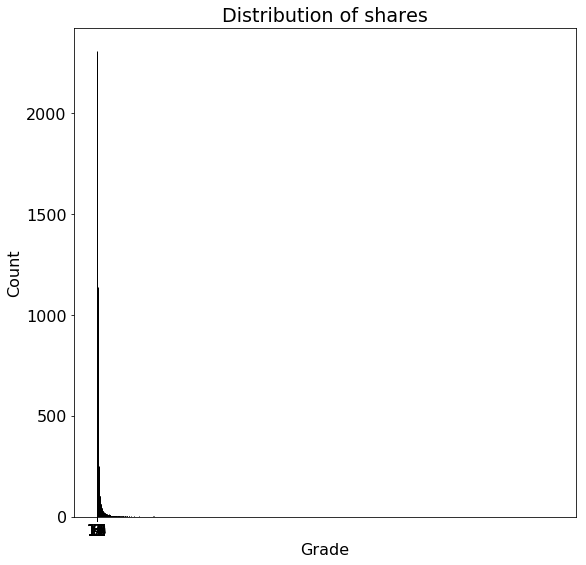

In [20]:
# Import Matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (9, 9)

# Bar plot of grades
plt.bar(df['shares'].value_counts().index, 
        df['shares'].value_counts().values,
         fill = 'navy', edgecolor = 'k', width = 1)
plt.xlabel('Grade'); 
plt.ylabel('Count'); 
plt.title('Distribution of shares');
plt.xticks(list(range(5, 20)));

### 14. Looking for numerical Correlations with the target columns Correlation accross all field

In [21]:
df_corr = df.corr()

In [22]:
df_corr.style.background_gradient()

### Correlation accross labels 


In [23]:
df.corr()['shares'].sort_values(ascending=False)

shares                           1.000000
kw_avg_avg                       0.110413
LDA_03                           0.083771
kw_max_avg                       0.064306
self_reference_avg_sharess       0.057789
self_reference_min_shares        0.055958
self_reference_max_shares        0.047115
num_hrefs                        0.045404
kw_avg_max                       0.044686
kw_min_avg                       0.039551
num_imgs                         0.039388
global_subjectivity              0.031604
kw_avg_min                       0.030406
kw_max_min                       0.030114
abs_title_sentiment_polarity     0.027135
num_videos                       0.023936
title_subjectivity               0.021967
num_keywords                     0.021818
is_weekend                       0.016958
weekday_is_saturday              0.015082
title_sentiment_polarity         0.012772
avg_positive_polarity            0.012142
max_positive_polarity            0.010068
weekday_is_monday                0

## 15. Visualizing the numerical correlation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2b1ce3ca2908>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x2b1d3b4e3dd8>]], dtype=object)

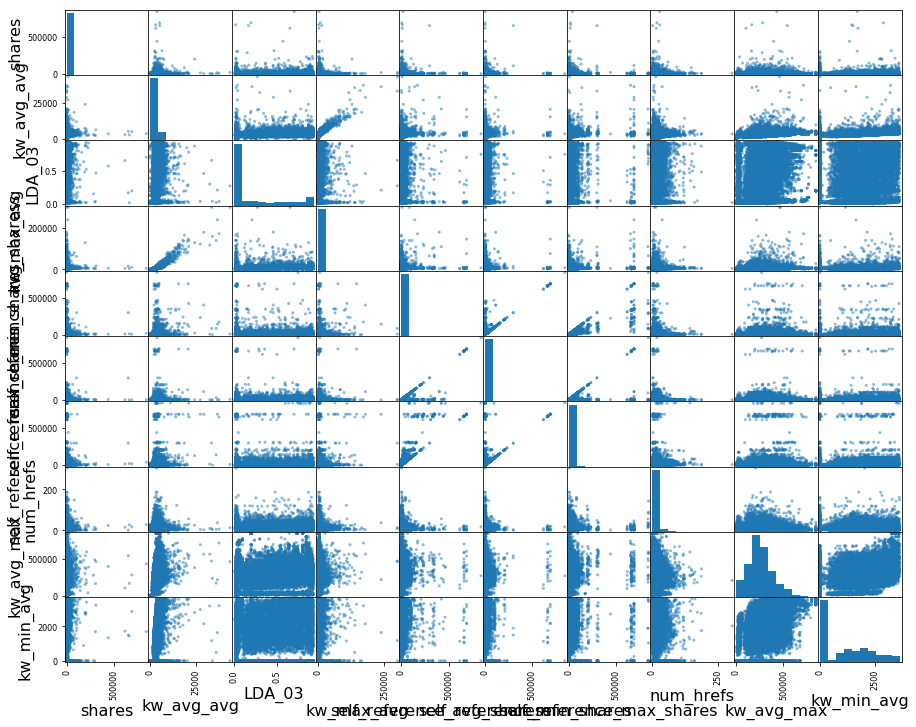

In [41]:
from pandas.plotting import scatter_matrix

#Extract the top attribute
attributes = list(df.corr()['shares'].sort_values(ascending=False).keys()[0:10])
scatter_matrix(df[attributes], figsize=(15, 12))

## 16. Visualizing Numerical Correlation Between Two Attributes

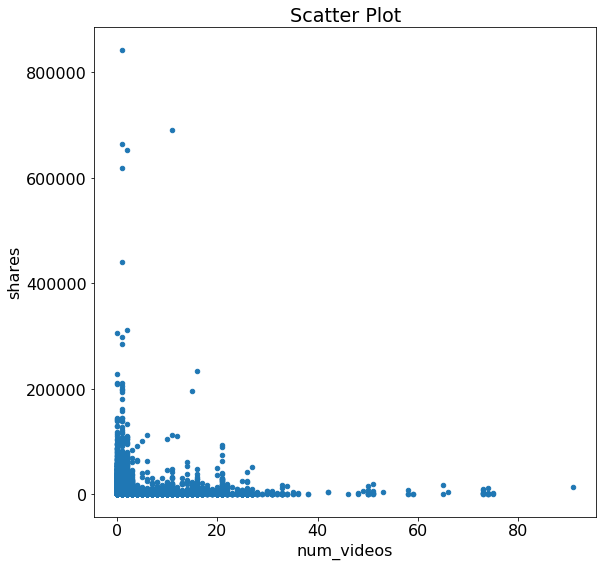

In [25]:
df.plot(title="Scatter Plot", kind="scatter", x="num_videos", y="shares")

## 17. Categorical Correlation using One-hot encoding


In [26]:
# select a few of binary columns to convert to 
# string valued
to_convert = ['is_weekend', 'weekday_is_monday',
             'weekday_is_monday','weekday_is_tuesday',
             'weekday_is_wednesday','weekday_is_thursday',
             'weekday_is_friday']

try: 
    df = df.drop('url', axis=1)
except:
    pass

for con in to_convert:
    df[con] = (df[con]).apply(lambda x: str(x))

In [27]:
#Drop the url col before one hot coded it 

category_df = df.select_dtypes(['object'])
# category_df.drop('url', axis=1)

# One hot encode the variables
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html
dummy_df = pd.get_dummies(category_df)

# print(dummy_df)
# Put the grade back in the dataframe
dummy_df['shares'] = df['shares']

dummy_df.head()

,weekday_is_monday_0.0,weekday_is_monday_1.0,weekday_is_tuesday_0.0,weekday_is_tuesday_1.0,weekday_is_wednesday_0.0,weekday_is_wednesday_1.0,weekday_is_thursday_0.0,weekday_is_thursday_1.0,weekday_is_friday_0.0,weekday_is_friday_1.0,is_weekend_0.0,is_weekend_1.0,shares
0,0,1,1,0,1,0,1,0,1,0,1,0,593
1,0,1,1,0,1,0,1,0,1,0,1,0,711
2,0,1,1,0,1,0,1,0,1,0,1,0,1500
3,0,1,1,0,1,0,1,0,1,0,1,0,1200
4,0,1,1,0,1,0,1,0,1,0,1,0,505


## 18. Looking for Categorical Correlation with the dataset column

In [28]:
# Correlations in one-hot encoded dataframe
dummy_df.corr()['shares'].sort_values(ascending=False)

shares                      1.000000
is_weekend_1.0              0.016958
weekday_is_monday_1.0       0.009726
weekday_is_thursday_0.0     0.008833
weekday_is_tuesday_0.0      0.007941
weekday_is_friday_0.0       0.003884
weekday_is_wednesday_0.0    0.003801
weekday_is_wednesday_1.0   -0.003801
weekday_is_friday_1.0      -0.003884
weekday_is_tuesday_1.0     -0.007941
weekday_is_thursday_1.0    -0.008833
weekday_is_monday_0.0      -0.009726
is_weekend_0.0             -0.016958
Name: shares, dtype: float64

## 18. Generate an effective fetures set(end goal of EDA)

### 18(a) Drop the redundant and meaningless features
- There is no redundant features most features is nearly indepentdent.

### 18(b) Generate an effective feature set: Select a set of features

In [29]:
## COmbnine one-hot coded categorical features with 
## numerical features
df = pd.get_dummies(df)

most_correlated = df.corr().abs()['shares'].sort_values(ascending=False)
print("Most Correlated\n",most_correlated)

Most Correlated
 shares                           1.000000
kw_avg_avg                       0.110413
LDA_03                           0.083771
kw_max_avg                       0.064306
LDA_02                           0.059163
self_reference_avg_sharess       0.057789
self_reference_min_shares        0.055958
data_channel_is_world            0.049497
self_reference_max_shares        0.047115
num_hrefs                        0.045404
kw_avg_max                       0.044686
kw_min_avg                       0.039551
num_imgs                         0.039388
avg_negative_polarity            0.032029
global_subjectivity              0.031604
kw_avg_min                       0.030406
kw_max_min                       0.030114
abs_title_sentiment_polarity     0.027135
num_videos                       0.023936
average_token_length             0.022007
title_subjectivity               0.021967
num_keywords                     0.021818
max_negative_polarity            0.019300
min_negative_pola

### 18(c)  Generating an Effective Feature Set: Combine a Set of Features
- I found that since the data is not linear dependent to each other. I found it is best to leave the data the way it is. 

## 19. Edit the DataFrame to contain Only most correlated Feaures

In [30]:
# Edit the DataFrame to Contain Only the Most Correlated Features¶
df = df.ix[:, most_correlated.index]

to_drop = ['is_weekend_0.0', 'weekday_is_wednesday_0.0',
           'weekday_is_thursday_0.0', 'weekday_is_monday_0.0']

df = df.drop(to_drop, axis=1) # This feature has the same correlation as schoolsup_yes


df.head()

/util/opt/anaconda/4.3.14/envs/jupyterhub-root/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,shares,kw_avg_avg,LDA_03,kw_max_avg,LDA_02,self_reference_avg_sharess,self_reference_min_shares,data_channel_is_world,self_reference_max_shares,num_hrefs,...,LDA_00,n_tokens_content,num_self_hrefs,abs_title_subjectivity,kw_min_min,n_unique_tokens,global_rate_positive_words,n_non_stop_words,n_non_stop_unique_tokens,min_positive_polarity
0,593,0.0,0.041263,0.0,0.040005,496.000000,496.0,0.0,496.0,4.0,...,0.500331,219.0,2.0,0.000000,0.0,0.663594,0.045662,1.0,0.815385,0.100000
1,711,0.0,0.050101,0.0,0.050096,0.000000,0.0,0.0,0.0,3.0,...,0.799756,255.0,1.0,0.500000,0.0,0.604743,0.043137,1.0,0.791946,0.033333
2,1500,0.0,0.033334,0.0,0.033351,918.000000,918.0,0.0,918.0,3.0,...,0.217792,211.0,1.0,0.500000,0.0,0.575130,0.056872,1.0,0.663866,0.100000
3,1200,0.0,0.028905,0.0,0.494651,0.000000,0.0,0.0,0.0,9.0,...,0.028573,531.0,0.0,0.500000,0.0,0.503788,0.041431,1.0,0.665635,0.136364
4,505,0.0,0.028572,0.0,0.028575,3151.157895,545.0,0.0,16000.0,19.0,...,0.028633,1072.0,19.0,0.045455,0.0,0.415646,0.074627,1.0,0.540890,0.033333


### Generate effective features by combinding a set of features


In [31]:

most_corr = df.corr()['shares'].sort_values(ascending=False)#Use all in this case
print(most_corr)

shares                           1.000000
kw_avg_avg                       0.110413
LDA_03                           0.083771
kw_max_avg                       0.064306
self_reference_avg_sharess       0.057789
self_reference_min_shares        0.055958
self_reference_max_shares        0.047115
num_hrefs                        0.045404
kw_avg_max                       0.044686
kw_min_avg                       0.039551
num_imgs                         0.039388
global_subjectivity              0.031604
kw_avg_min                       0.030406
kw_max_min                       0.030114
abs_title_sentiment_polarity     0.027135
num_videos                       0.023936
title_subjectivity               0.021967
num_keywords                     0.021818
is_weekend_1.0                   0.016958
weekday_is_saturday              0.015082
title_sentiment_polarity         0.012772
avg_positive_polarity            0.012142
max_positive_polarity            0.010068
weekday_is_monday_1.0            0

## 19. Edit Dataframe to contain only the most correlated features
- Slicing step.

In [32]:
#In this case, ,most_corr.index will return an Index class 
# basically, this operation below will slice all relevant columns
df_corr = df.ix[:,most_corr.index]
df_corr.head()

/util/opt/anaconda/4.3.14/envs/jupyterhub-root/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,shares,kw_avg_avg,LDA_03,kw_max_avg,self_reference_avg_sharess,self_reference_min_shares,self_reference_max_shares,num_hrefs,kw_avg_max,kw_min_avg,...,rate_positive_words,data_channel_is_tech,LDA_04,data_channel_is_entertainment,min_negative_polarity,max_negative_polarity,average_token_length,avg_negative_polarity,data_channel_is_world,LDA_02
0,593,0.0,0.041263,0.0,496.000000,496.0,496.0,4.0,0.0,0.0,...,0.769231,0.0,0.040123,1.0,-0.600,-0.200000,4.680365,-0.350000,0.0,0.040005
1,711,0.0,0.050101,0.0,0.000000,0.0,0.0,3.0,0.0,0.0,...,0.733333,0.0,0.050001,0.0,-0.125,-0.100000,4.913725,-0.118750,0.0,0.050096
2,1500,0.0,0.033334,0.0,918.000000,918.0,918.0,3.0,0.0,0.0,...,0.857143,0.0,0.682188,0.0,-0.800,-0.133333,4.393365,-0.466667,0.0,0.033351
3,1200,0.0,0.028905,0.0,0.000000,0.0,0.0,9.0,0.0,0.0,...,0.666667,0.0,0.028572,1.0,-0.600,-0.166667,4.404896,-0.369697,0.0,0.494651
4,505,0.0,0.028572,0.0,3151.157895,545.0,16000.0,19.0,0.0,0.0,...,0.860215,1.0,0.885427,0.0,-0.500,-0.050000,4.682836,-0.220192,0.0,0.028575


### Information about each features

- 27. kw_avg_avg: Avg. keyword (avg. shares) 
- 42. LDA_03: Closeness to LDA topic 3
- 26. kw_max_avg: Avg. keyword (max. shares) 
- 30. self_reference_avg_sharess: Avg. shares of referenced articles in Mashable
- 28. self_reference_min_shares: Min. shares of referenced articles in Mashable 
- 29. self_reference_max_shares: Max. shares of referenced articles in Mashable
- 7. num_hrefs: Number of links

## 20. Generate pairs plot of selected variables
- To plot relationship between variable we can use pair plots. 
- Pair plot offer a range of display of paired combinaation of categorical and quantitative variales. 
- A pair plot allow 

In [33]:
## I could not install seaborn
##lib on my HCC acc server

## 21. Create a Separate Feature Set (Data Matrix X) and Target (1D Vector y)

In [34]:
allData = df_corr
y = df_corr['shares']
X = df_corr.drop('shares', axis=1)

X.head()

,kw_avg_avg,LDA_03,kw_max_avg,self_reference_avg_sharess,self_reference_min_shares,self_reference_max_shares,num_hrefs,kw_avg_max,kw_min_avg,num_imgs,...,rate_positive_words,data_channel_is_tech,LDA_04,data_channel_is_entertainment,min_negative_polarity,max_negative_polarity,average_token_length,avg_negative_polarity,data_channel_is_world,LDA_02
0,0.0,0.041263,0.0,496.000000,496.0,496.0,4.0,0.0,0.0,1.0,...,0.769231,0.0,0.040123,1.0,-0.600,-0.200000,4.680365,-0.350000,0.0,0.040005
1,0.0,0.050101,0.0,0.000000,0.0,0.0,3.0,0.0,0.0,1.0,...,0.733333,0.0,0.050001,0.0,-0.125,-0.100000,4.913725,-0.118750,0.0,0.050096
2,0.0,0.033334,0.0,918.000000,918.0,918.0,3.0,0.0,0.0,1.0,...,0.857143,0.0,0.682188,0.0,-0.800,-0.133333,4.393365,-0.466667,0.0,0.033351
3,0.0,0.028905,0.0,0.000000,0.0,0.0,9.0,0.0,0.0,1.0,...,0.666667,0.0,0.028572,1.0,-0.600,-0.166667,4.404896,-0.369697,0.0,0.494651
4,0.0,0.028572,0.0,3151.157895,545.0,16000.0,19.0,0.0,0.0,20.0,...,0.860215,1.0,0.885427,0.0,-0.500,-0.050000,4.682836,-0.220192,0.0,0.028575


## 22. Create a Separate Test Set Data

In [35]:
from sklearn.model_selection import train_test_split

#split intoo training/testing sets with 20% split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 23. Establish benchmark
### Metrics
- To evaluate the performance of this regression tak, we will use the 2 standard metrics:
    - Mean Absolute Error(MAE): Average of the absolute value of the difference between prediction and the true values
    - Root mean square error(RMSE): The square root of the average of the squared difference between the predictions and the true values 

The mean absolute error is more interpretable, the the RMSE penalizes learger errors more heavily. Either one may be appropriate depending on the situation

In [36]:
# Calculate mae and rmse
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))
    
    return mae, rmse

## 24.Naive baseline
- For a regression task, a simple naive baseline is to guess the median value on the training set for all testing case. 
- If our machine learning model cannot do better than this baseline, then perhap we should try a difference approach

In [37]:
median_pred = y_train.median()
print(median_pred)

median_preds = [median_pred for _ in range(len(y_test))]
gtrue = y_test 

# Display the baseline metric
mb_mae, mb_rmse = evaluate_predictions(median_preds, gtrue)
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))

1400.0
Median Baseline  MAE: 2395.4153
Median Baseline RMSE: 11152.8831


## 25. Linear regression Using Scikit-learn
- 2 step:
    - Create model(Linear regression object)
    - train the model
    
- Then, We can find the intercept and features weights by using the 'intercept' and 'coef' methods of the linear regression object respectively. 
- Finally, you can make prediction using `predict()` method

### Performance measurement of Regression models in sklearn
- RMSE: scikit learn 'Mean_square_error" function can be used to compute the RMSE for the whole training set
- r2_score: skelarn 'r2_score" function also called the coefficient of determination regerssion score function or the r2(r squared or r^2) scores. It measure the propotion of the variance in the dependent variable(target) that is predictable from the indepentdent variable(s), features. The best possible scores of r2 is 1.0 and it can be negative(because the model can be arbitary worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R62 scores of 0.0

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#create a linear model object
model = LinearRegression()

#train the model using the training data and label 
model.fit(X_train, y_train)

# the intercept 
b = model.intercept_
print("Intercept: ", b)

#the features weight
m = model.coef_
print("Coeff:",m)

## Show the predicted formula 
result = ""
for idx, c in enumerate(m):
    result += str(c) + " * x_%d + "%idx
    
#WHere x_0=0
print("\nF(x)=",result)

#Make the predictions using the test data
y_pred = model.predict(X_test)

print('accuracy', (y_pred==y_test).mean())
print("\nMSE(Mean square error):",mean_squared_error(y_test, y_pred), "\nr^2(Coeff of determination):",r2_score(y_test, y_pred))

Intercept:  1320378.78188
Coeff: [  1.61867920e+00  -1.32239163e+06  -1.99331420e-01  -1.13812132e-02
   2.29598691e-02   8.13965884e-03   2.54658735e+01   1.74834609e-04
  -3.54949711e-01   5.44975061e+00   2.81702737e+03  -4.50943356e-01
   1.04631019e-01   7.24543629e+02   7.79195224e+00  -9.99264111e+01
   5.36169304e+01   1.72328376e+02   3.22416816e+02   1.33306306e+02
  -1.61282711e+03   1.76819903e+02   3.12913083e+02   1.44851338e+02
   1.77443281e+00  -1.50072998e+02   1.04292005e+02  -3.30442136e-04
   4.30376888e+03  -1.05608791e+03  -6.64191104e+02   1.68486147e+03
  -2.77216989e-03   6.27042526e+01   7.97877263e-01   8.10781595e+02
   2.82686535e+03  -1.49735601e+04  -2.35915613e+03  -1.29389181e+03
  -1.82398433e+03   4.60405177e-01  -6.61234920e+01  -1.32191409e+06
  -2.56700459e+01  -6.27061876e+01   2.17396352e+03  -1.04292480e+02
  -2.92565644e+02  -1.32286484e+06  -1.20084272e+03   1.99819174e+03
  -6.41487073e+02  -1.32245945e+06  -1.23018238e+03   4.04219718e+02
 

In [39]:
import numpy as np

# Model Metrics
mae = np.mean(abs(y_pred - y_test))
rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))

print("Linear Regression MAE: ", mae)
print("Linear Regression RMSE: ", rmse)


# Baseline Metrics
baseline = np.median(y_train)
baseline_mae = np.mean(abs(baseline - y_test))
baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))


print("\nBaseline MAE: ", baseline_mae)
print("Baseline RMSE: ", baseline_rmse)

Linear Regression MAE:  3007.68962403
Linear Regression RMSE:  10838.9417185

Baseline MAE:  2395.41531088
Baseline RMSE:  11152.8830928
